In [ ]:
import pandas as pd
import math
import ast
import torch

In [ ]:
# GPU가 사용 가능한지 확인 및 사용
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
from google.colab import drive
import pandas as pd

# Google Drive 마운트
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

# 파일 경로
file_path = '/content/drive/My Drive/Colab Notebooks/CJ_Hackathon/Data/'

#로드
df = pd.read_excel(file_path + 'perfume_database.xlsx')


In [ ]:
df.columns

Index(['brand', 'perfume', 'image', 'main_accords', 'top notes',
       'middle notes', 'base notes'],
      dtype='object')

In [ ]:
df = df.dropna(subset=['main_accords'])


In [ ]:
#사용예정 컬럼 추출
df_col = df[['perfume', 'main_accords', 'top notes','middle notes', 'base notes']]

# Preprocessing

In [ ]:
# 'main_accords' 컬럼의 값들을 쉼표 기준으로 분리
accords = df_col['main_accords'].str.split(',')

# 각 단어를 두 번씩 포함하는 새로운 리스트 생성
double_accords = accords.apply(lambda x: [item for item in x for _ in range(2)])

# 새로운 리스트를 쉼표로 연결하여 문자열로 변환
df_col['main_accords'] = double_accords.apply(lambda x: ','.join(x))


<ipython-input-8-7e9b4bb349e6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['main_accords'] = double_accords.apply(lambda x: ','.join(x))


### Text preprocessing(clean text)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize

In [ ]:
# 어간 추출
def stem_words(text):
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    return text


# 소문자 변환
def make_lower_case(text):
    return " ".join([word.lower() for word in text.split()])

# 불용어 제거
def remove_stop_words(text):
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text


# 따옴표 제거
def remove_quotes(text):
    if isinstance(text, str):
        return text.replace('"', "")
    elif isinstance(text, list):
        return ["".join(t).replace('"', "") for t in text]
    else:
        return text

# 쉼표 제거
def remove_commas(text):
    if isinstance(text, list):
        return [t.rstrip(',') for t in text]
    else:
        return text



In [ ]:
# 소문자 변환
df['main accords_pre'] = df_col['main_accords'].astype(str).apply(make_lower_case)
df['perfume_pre'] = df_col['perfume'].astype(str).apply(make_lower_case)
df['main accords_pre'] = df_col['main_accords'].astype(str).apply(make_lower_case)
df['top notes_pre'] = df_col['top notes'].astype(str).apply(make_lower_case)
df['middle notes_pre'] = df_col['middle notes'].astype(str).apply(make_lower_case)
df['base notes_pre'] = df_col['base notes'].astype(str).apply(make_lower_case)

In [ ]:
df['main accords_pre'] = df_col['main_accords'].apply(make_lower_case)
df['main accords_pre'] = df_col['main_accords'].apply(remove_stop_words)
df['main accords_pre'] = df_col['main_accords'].apply(stem_words)
df['main accords_pre'] = df_col['main_accords'].apply(remove_quotes)
df['main accords_pre'] = df_col['main_accords'].apply(remove_commas)

In [ ]:
df['main accords_pre'][:3]

0    wine,wine, vanilla, vanilla, sweet, sweet, woo...
1    woody,woody, musky, musky, balsamic, balsamic,...
2    yellow floral,yellow floral, white floral, whi...
Name: main accords_pre, dtype: object

In [ ]:
df_col['perfume'] = df_col['perfume'].astype(str)

df['perfume_pre'] = df_col['perfume'].apply(make_lower_case)
df['perfume_pre'] = df_col['perfume'].apply(remove_stop_words)
df['perfume_pre'] = df_col['perfume'].apply(stem_words)
df['perfume_pre'] = df_col['perfume'].apply(remove_quotes)
df['perfume_pre'] = df_col['perfume'].apply(remove_commas)


<ipython-input-15-83871b2f9b3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['perfume'] = df_col['perfume'].astype(str)


In [ ]:
df['main accords_pre'] = df_col['main_accords'].apply(make_lower_case)
df['main accords_pre'] = df_col['main_accords'].apply(remove_stop_words)
df['main accords_pre'] = df_col['main_accords'].apply(stem_words)
df['main accords_pre'] = df_col['main_accords'].apply(remove_quotes)
df['main accords_pre'] = df_col['main_accords'].apply(remove_commas)



In [ ]:
df_col['top notes'] = df_col['top notes'].astype(str)

df['top notes_pre'] = df_col['top notes'].apply(stem_words)
df['top notes_pre'] = df_col['top notes'].apply(make_lower_case)
df['top notes_pre'] = df_col['top notes'].apply(remove_stop_words)
df['top notes_pre'] = df_col['top notes'].apply(remove_quotes)
df['top notes_pre'] = df_col['top notes'].apply(remove_commas)


<ipython-input-17-80456309f503>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['top notes'] = df_col['top notes'].astype(str)


In [ ]:
df_col['middle notes'] = df_col['middle notes'].astype(str)

df['middle notes_pre'] = df_col['middle notes'].apply(stem_words)
df['middle notes_pre'] = df_col['middle notes'].apply(make_lower_case)
df['middle notes_pre'] = df_col['middle notes'].apply(remove_stop_words)
df['middle notes_pre'] = df_col['middle notes'].apply(remove_quotes)
df['middle notes_pre'] = df_col['middle notes'].apply(remove_commas)


<ipython-input-18-82735ecac27f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['middle notes'] = df_col['middle notes'].astype(str)


In [ ]:
df_col['base notes'] = df_col['base notes'].astype(str)

df['base notes_pre'] = df_col['base notes'].apply(stem_words)
df['base notes_pre'] = df_col['base notes'].apply(make_lower_case)
df['base notes_pre'] = df_col['base notes'].apply(remove_stop_words)
df['base notes_pre'] = df_col['base notes'].apply(remove_quotes)
df['base notes_pre'] = df_col['base notes'].apply(remove_commas)


<ipython-input-19-15adfd18cda1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['base notes'] = df_col['base notes'].astype(str)


In [ ]:
df_nltk = df[['perfume_pre', 'main accords_pre',
              'top notes_pre','middle notes_pre','base notes_pre']]

# Word2vec imbedding (using TF-IDF)

TF-IDF 벡터화를 이용하면 단어의 빈도가 높고 문서 간에 잘 분포되어 있는 단어일수록 높은 가중치를 가지게 된다. 이렇게 계산된 TF-IDF 가중치를 Word2Vec 임베딩 벡터에 곱하면, 가중치가 큰 단어의 임베딩 벡터 값이 더 크게 반영되어 분류 모델 성능의 향상을 기대할 수 있을 것이다
.

In [ ]:
df_nltk['full_document'] = df_nltk['perfume_pre'].astype(str) + ' ' \
+ df_nltk['main accords_pre'].astype(str) + ' ' \
+ df_nltk['top notes_pre'].astype(str) + ' ' \
+ df_nltk['middle notes_pre'].astype(str) + ' ' \
+ df_nltk['base notes_pre'].astype(str)


<ipython-input-21-19c1fd26747a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nltk['full_document'] = df_nltk['perfume_pre'].astype(str) + ' ' \


In [ ]:
df_nltk.head()

,perfume_pre,main accords_pre,top notes_pre,middle notes_pre,base notes_pre,full_document
0,Sweet Tobacco Spirits,"wine,wine, vanilla, vanilla, sweet, sweet, woo...",nan,"citruses, saffron, tonka bean, vanilla, exotic...",nan,"Sweet Tobacco Spirits wine,wine, vanilla, vani..."
1,Cashmere Musk,"woody,woody, musky, musky, balsamic, balsamic,...",nan,"sandalwood, cedar, white musk, cashmere wood",nan,"Cashmere Musk woody,woody, musky, musky, balsa..."
2,Exotic Ylang Ylang,"yellow floral,yellow floral, white floral, whi...",nan,"ylang-ylang, gardenia, musk",nan,"Exotic Ylang Ylang yellow floral,yellow floral..."
3,Exquisite Amber,"balsamic,balsamic, vanilla, vanilla, amber, am...",nan,"labdanum, styrax, benzoin, vanilla, musk",nan,"Exquisite Amber balsamic,balsamic, vanilla, va..."
4,Oudwood Veil,"oud,oud, amber, amber, fresh spicy, fresh spic...",nan,"kephalis, agarwood (oud)",nan,"Oudwood Veil oud,oud, amber, amber, fresh spic..."


## Tokenization

In [ ]:
def tokenize(text):
    tokens = text.split()  # 공백을 기준으로 분할
    return tokens

df_nltk['full_document'] = df_nltk['full_document'].apply(tokenize)


<ipython-input-23-9ba6da47687d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nltk['full_document'] = df_nltk['full_document'].apply(tokenize)


In [ ]:
df_nltk['full_document'].head()

0    [Sweet, Tobacco, Spirits, wine,wine,, vanilla,...
1    [Cashmere, Musk, woody,woody,, musky,, musky,,...
2    [Exotic, Ylang, Ylang, yellow, floral,yellow, ...
3    [Exquisite, Amber, balsamic,balsamic,, vanilla...
4    [Oudwood, Veil, oud,oud,, amber,, amber,, fres...
Name: full_document, dtype: object

## TF-IDF 가중치 계산

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


df_nltk['full_document'].fillna('', inplace=True)

# 'full_document' 컬럼으로부터 문장 리스트 생성
sentences = df_nltk['full_document'].tolist()
sentences = [' '.join(s) for s in sentences]
sentences = [' '.join([word for word in s.split() if word != 'nan']) for s in sentences]


# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sentences)

# 단어별 TF-IDF 가중치 계산
word2weight = {word: tfidf_matrix.getcol(idx).sum() for word, idx in vectorizer.vocabulary_.items()}


<ipython-input-25-281c6b1a46f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nltk['full_document'].fillna('', inplace=True)


In [ ]:
top_10_weights = sorted(word2weight.items(), key=lambda x: x[1], reverse=True)[:10]

for word, weight in top_10_weights:
    print(f'단어: {word}, 가중치: {weight}')

단어: floral, 가중치: 3897.5526999147305
단어: spicy, 가중치: 3369.853173879749
단어: woody, 가중치: 3177.028666480087
단어: fresh, 가중치: 2900.008458201118
단어: citrus, 가중치: 2769.153779817754
단어: rose, 가중치: 2389.8146682768333
단어: white, 가중치: 2325.6560890423198
단어: aromatic, 가중치: 2320.7619374034257
단어: green, 가중치: 2276.305215331437
단어: sweet, 가중치: 2256.7182035922656


## Word2vec을 통한 연관단어 임베딩

In [ ]:
from gensim.models import Word2Vec
import numpy as np


# Word2Vec 모델 학습
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# 단어 임베딩 추출
word_vectors = model.wv

# TF-IDF 가중치 적용하여 임베딩 벡터 추출
X = []
for sentence in sentences:
    embedding = []
    for word in sentence:
        if word in word_vectors.key_to_index:  # 단어가 Word2Vec 모델에 있는지 확인
            # TF-IDF 가중치 적용하여 단어 임베딩 계산 (단어가 없으면 기본값 1.0 사용)
            weighted_embedding = word_vectors.get_vector(word) * word2weight.get(word, 1.0)
            embedding.append(weighted_embedding)
    # 각 문장에 대해 단어 임베딩의 평균 계산 (단어가 하나도 없는 경우 제외)
    if embedding:
        average_embedding = np.mean(embedding, axis=0)
        X.append(average_embedding)

In [ ]:
import pickle

# 평균 임베딩을 pickle 파일로 저장
with open('embedding_result_perfume.pkl', 'wb') as f:
    pickle.dump(X, f)

# Clustering

## 최적의 K를 위한 Elbow Point 확인

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

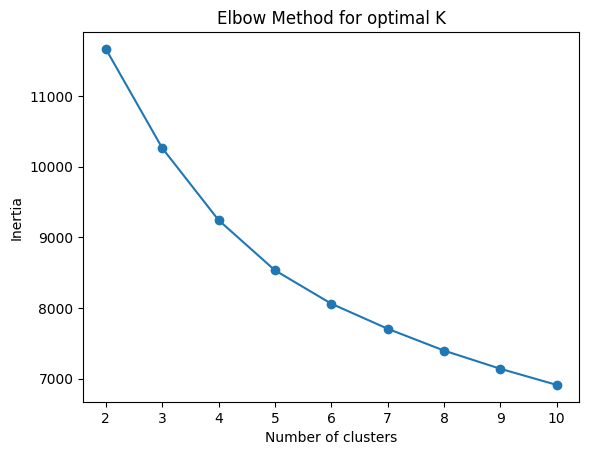

In [ ]:
# 군집 개수 범위 설정
min_k = 2  # 최소 군집 개수
max_k = 10  # 최대 군집 개수

# 군집 내 제곱 합 기록
inertia_values = []

for k in range(min_k, max_k + 1):
    # K-means 군집화
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# 군집 개수에 따른 군집 내 제곱 합 시각화
plt.plot(range(min_k, max_k + 1), inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for optimal K')
plt.show()


X축에 따라 Y축의 감소율이 크게 작아지는 5를 K로 설정



## K-means Clustering

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
clusters = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#원본 df에 레이블링
df['Cluster'] = clusters

In [ ]:
#원본 컬럼 및 군집 레이블 따로 추출
df_save = df[['Cluster','perfume','main_accords', 'top notes', 'middle notes','base notes']]

In [ ]:
#같은 cluster 값끼리 볼 수 있도록 정렬
df_sorted = df_save.sort_values(by='Cluster')

In [ ]:
df_sorted.to_csv('Result_Clustering.csv')

In [ ]:
import pickle

# Kmeans 모델 저장
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

In [ ]:

# tfidf 모델 저장
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
# word2vec 모델 저장
with open('word2vec_model.pkl', 'wb') as f:
    pickle.dump(model, f)